In [1]:
%load_ext lab_black

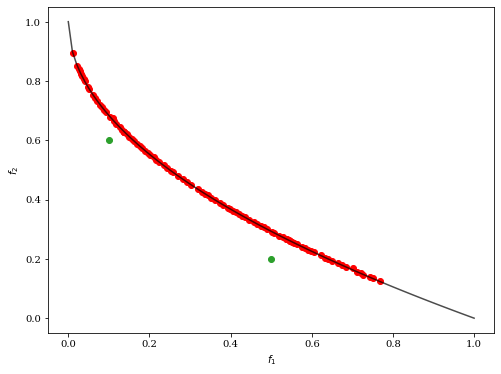

In [2]:
import numpy as np

from pymoo.algorithms.rnsga2 import RNSGA2
from pymoo.factory import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt1", n_var=30)
pf = problem.pareto_front()

# Define reference points
ref_points = np.array([[0.5, 0.2], [0.1, 0.6]])

# Get Algorithm
algorithm = RNSGA2(
    ref_points=ref_points,
    pop_size=100,
    epsilon=0.01,
    normalization="front",
    extreme_points_as_reference_points=False,
    weights=np.array([0.5, 0.5]),
)

res = minimize(
    problem,
    algorithm,
    save_history=True,
    termination=("n_gen", 600),
    seed=1,
    pf=pf,
    disp=False,
)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, color="red")
plot.add(ref_points, label="ref_points")
plot.show()